# 專利管理圖、只有upc, ipc, cpc, Assignee, Inventors的圖。

# 使用方式，在第一個 In[?] 的patlist = [ ]中輸入專利號，然後按Ctrl+Enter，

# 之後在每個In[?]按Ctrl+Enter，就會產生前述5個圖表。

由於要爬美國專利資料庫，所以會爬比較久，要等第一個欄的星星(*)變成數字，才代表完成，建議每天不要爬超過160件專利，超過200件有可能被美國專利局的伺服器踢掉，列黑名單。

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

def urltemplate(template):
    def opener(**kwargs):
        return urlopen(template.format_map(kwargs))
    return opener

def getBiog(patNo):
	Usurltempale ="http://patft.uspto.gov/netacgi/nph-Parser?Sect2=PTO1&Sect2=HITOFF&p=1&u=%2Fnetahtml%2FPTO%2Fsearch-bool.html&r=1&f=G&l=50&d=PALL&RefSrch=yes&Query=PN%2F{patNo}"
	USpatent = urltemplate(Usurltempale)

	Pat_html = USpatent(patNo=patNo)
	bsObj = BeautifulSoup(Pat_html.read(), "lxml")
	tables = bsObj.findChildren("table")

	datas = []
	for table in tables:
		rows = table.findChildren(['tr'])
		for row in rows:
			cells = row.findChildren(['th', 'td'])
			for cell in cells:
				cell_content = cell.getText()
				cleandata = re.sub( '\s+'    , ' ', cell_content).strip()
				cleandata = re.sub( '\(.*?\)', '' , cleandata).strip()
				cleandata = re.sub( '&nbsp'  , ' ', cleandata).strip()    
				datas.append(cleandata)         
	#print(datas)
	truplelist = []
	for i, x in enumerate(datas):
		if x =='United States Patent' : 
			truplelist.append((datas[i], datas[i+1])) 
			truplelist.append(('Date of Patent', datas[i+3]))
			continue
		if x =='Inventors:' : truplelist.append((datas[i], datas[i+1]));continue 
		if x =='Assignee:'  : truplelist.append((datas[i], datas[i+1]));continue 
		if x =='Appl. No.:' : truplelist.append((datas[i], datas[i+1]));continue 
		if x =='Filed:'  : truplelist.append((datas[i], datas[i+1]))   ;continue
		if x =='Current U.S. Class:' : truplelist.append((datas[i], datas[i+1]));continue 
		if x =='Current CPC Class:'  : truplelist.append((datas[i], datas[i+1]));continue
		if x =='Current International Class:' : truplelist.append((datas[i], datas[i+1]));continue
		if x =='Field of Search:'  :
			truplelist.append((datas[i], datas[i+1]))
			References = [(datas[i], datas[i+1], datas[i+2]) for i, x in enumerate(datas) \
                                            if re.match(r'(^\d{4}[/-]\d{7}$)|(^\d{7}$)', x)]
			truplelist.append(('CitedReferences', References))
			break
	return dict(truplelist)

patlist = ['5896186', '6530660', '6817710', '7070273', '7566127', '7886405', '8517532', '9541771']
mixeddata = list(map(getBiog, patlist))                 #取得所有專利的 UPC

Counter({'351/153': 5, '351/63': 5, '16/228': 3, '351/115': 3, '351/121': 2, '351/110': 1, '351/146': 1, '351/47': 1, '2/454': 1, '351/113': 1, '206/5': 1, '351/41': 1, '16/224': 1, '1/1': 1})


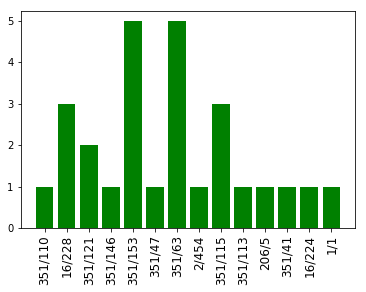

In [4]:
#UPC Chart
dataWanted = mixeddata
upclist = [x['Current U.S. Class:'] for x in dataWanted if 'Current U.S. Class:' in x] 

g = upclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()

Counter({'G02C 5/006': 6, 'G02C 5/2263': 6, 'Y10T 16/526': 5, 'G02C 5/229': 4, 'G02C 2200/28': 3, 'G02C 5/2209': 2, 'G02C 5/001': 2, 'G02C 5/14': 2, 'G02C 1/02': 1, 'G02C 1/06': 1, 'G02C 5/2272': 1, 'G02C 9/00': 1, 'G02C 2200/02': 1, 'F16C 11/0604': 1, 'Y10T 16/524': 1, 'G02C 5/10': 1})


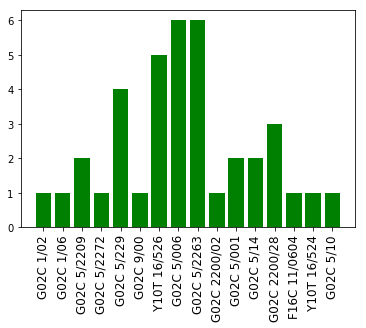

In [5]:
#CPC Chart

dataWanted = mixeddata
cpclist = [x['Current CPC Class:'] for x in dataWanted if 'Current CPC Class:' in x] 

g = cpclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


Counter({'G02C 5/22': 5, 'G02C 5/00': 3, 'G02C 5/08': 3, 'G02C 005/08': 2, 'G02C 9/00': 1, 'G02C 1/02': 1, 'G02C 1/00': 1, 'G02C 1/06': 1, 'G02C 001/02': 1, 'G02C 005/22': 1, 'G02C 005/14': 1, 'E05D 7/00': 1, 'G02C 5/10': 1})


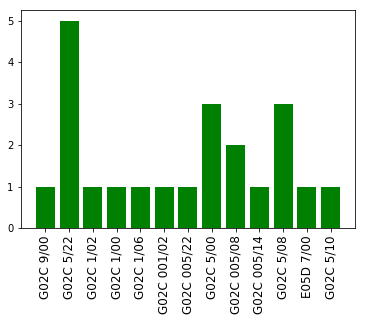

In [6]:
#IPC Chart

dataWanted = mixeddata
Ipclist = [x['Current International Class:'] for x in dataWanted if 'Current International Class:' in x] 

g = Ipclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


Counter({'180s, Inc.': 2, 'Contour Optik, Inc.': 1, 'Foto Ottica Cescon di Cescon Stefano , IT)': 1, 'Foto Ottica Cescon Di Cescon Stefano , IT)': 1, 'MICROVISION OPTICAL, LLC': 1})


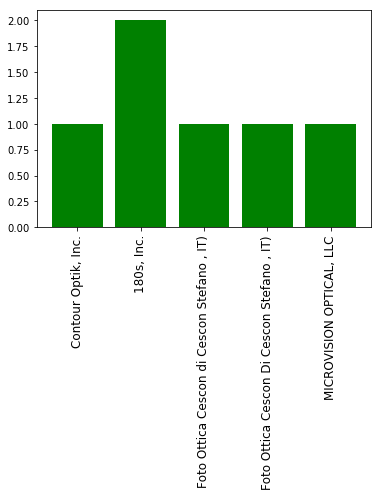

In [7]:
#Assignee Chart 專利權人分析圖

dataWanted = mixeddata
Assigneelist = [x['Assignee:'] for x in dataWanted if 'Assignee:' in x]

g = Assigneelist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()

Counter({'Benavides; Nestor M.': 2, 'Laine; Matthew': 2, 'Le Gette; Brian E.': 2, 'Reed; Russell': 2, 'Staley; David B.': 2, 'Tipp; Alan': 2, 'Werner; Justin S.': 2, 'Wilson': 2, 'II; Ronald L.': 2, 'Roban; Philip K': 1, 'Chao; David': 1, 'Cheng; Chi-Pei': 1, 'Breda; Pierluigi': 1, 'Mazzero; Alessandro': 1, 'Cescon; Stefano': 1, 'Hicks; Robert L.': 1, 'Duval; John': 1, 'Johnson; David A.': 1})


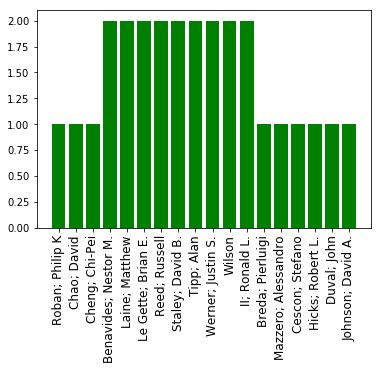

In [8]:
#Inventors Chart 發明人分析圖

dataWanted = mixeddata

Inventorslist = [x['Inventors:'] for x in dataWanted if 'Inventors:' in x]

g = Inventorslist              #要在這裡變更參數
ag = ",".join(g)
sg = list (map(str.strip, ag.split(','))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


In [2]:
#patlist = ['5896186', '6530660', '6817710', '7070273', '7566127', '7886405', '8517532', '9541771']
patlist = ['5896186']

[['Current U.S. Class:',
  '351/110; 16/228; 351/121; 351/146; 351/153; 351/47',
  'Current CPC Class:',
  'G02C 1/02 ; G02C 1/06 ; G02C 5/2209 ; G02C 5/2272 ; G02C 5/229 ; G02C 9/00 ; Y10T 16/526',
  'Current International Class:',
  'G02C 9/00 ; G02C 5/22 ; G02C 1/02 ; G02C 1/00 ; G02C 1/06 ; G02C 001/02 ; G02C 005/22',
  'Field of Search:',
  ';351/44,47,111,115,121,124,133,146,153,110 ;16/228']]